# ElasticNet (Regressão Linear do tipo Ridge + Lasso)

É um algoritmo de aprendizado de máquina que objetiva a estimação de uma função linear que condiciona o valor previsto para a variável dependente y com base nos valores das variáveis independentes X.

A ElasticNet une os métodos de regularização L1 e L2 (Ridge e Lasso) para a eliminação de variáveis redundantes, que não oferecem poder explicativo ao modelo. Para explicar a motivação do processo de estimação com regularização, faz-se necessário explicar alguns conceitos importantes.

##### Tradeoff Viês e Variância (Bias-Variance)

O viés e a variância são os erros de previsão mais comuns que podem ocorrer ao estimar modelos de machine learning. 

* **Viés:** É a baixa habilidade de capturar a verdadeira relação entre os dados, apresentada por cada algoritmo. Significa que o modelo é simples e generaliza demais no período de treinamento, o que o torna ineficiente. Um exemplo de modelo com alto viés é a Regressão Linear, que conforme o nome já diz, assume que a distribuição dos dados é linear. Nesse caso, ela não consegue se adaptar a um tipo de dado que apresente distribuição não-linear, por exemplo. Não é o caso da figura abaixo.

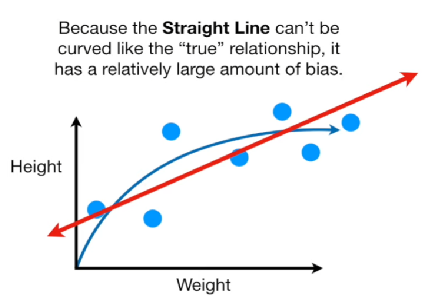

* **Variância:** É a sensibilidade do modelo a ser estimado, em relação aos dados utilizados para treiná-lo. Alta variância é ruim, pois significa que o modelo é complexo demais e não é capaz de generalizar o suficiente para explicar o processo gerador dos dados que serão previstos. Um exemplo de modelo com alta variância é a árvore de decisão, que se não é podada, estima perfeitamente o conjunto de treinamento e não é capaz de generalizar suas previsões para o período de teste.

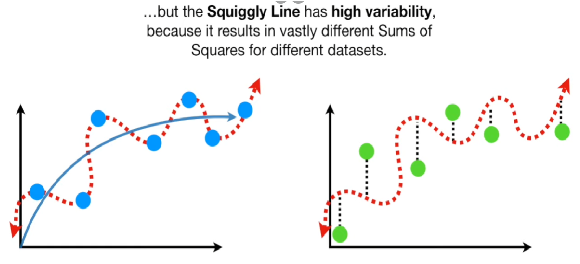

O maior desafio enfrentado por cientistas de dados no momento da modelagem é desenvolver modelos que ofereçam minimizar o viés e a variância ao mesmo tempo, assim apresentando maior confiabilidade em suas previsões. Em geral, modelos de baixo viés normalmente apresentam alta variância, e vice-versa.

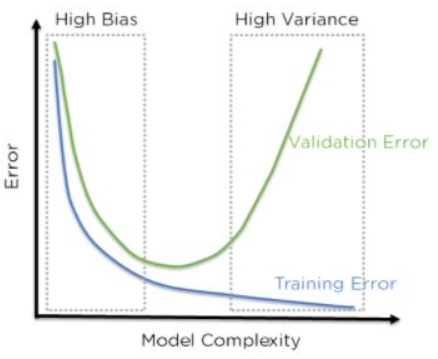


## Regularização: 

É um tipo de técnica utilizada para reduzir a variância dos modelos de machine learning, ou seja, reduzir sua sensibilidade aos dados de treinamento, e melhorando seu desempenho ao prever os dados de teste. A regressão linear do tipo ElasticNet realiza dois processos diferentes de regularização: Lasso e Ridge, ao mesmo tempo. 

##### Regressão Linear

Sabe-se que a ideia principal da regressão linear tradicional é encontrar a reta que minimiza a soma dos quadrados dos resíduos do período de treinamento. No processo de treinamento, faz-se a utilização da seguinte fórmula: 

$$min(\sum{y_{i}-\bar{y}})^2$$

Note que não há nenhum hiperparâmetro a ser otimizado, pois o modelo por si só assume diversos pressupostos fundamentais que permitem encontrar a solução ótima por meio de uma fórmula matemática. Isso é bastante ruim, pois não é possível realizar a validação cruzada para estimar os coeficientes angulares que melhor se adequam não só ao período de treino, mas ao período de teste também, apresentando maior viés (errando mais no treino) e menor variância (acertando mais no teste).  

##### Regressão LASSO (Least Absolute Shrinkage and Selection Operator)

A regressão do tipo L1 adiciona um componente que corresponde a um fator ($\lambda$) multiplicado pela soma do módulo de cada coeficiente angular da regressão estimada. Com isso, a fórmula a ser minimizada passa a corresponder a:

$$min(\sum{y_{i}-\bar{y}})^2 + \lambda_{1} \sum{|\beta|}$$

A intuição por trás do processo é de que o modelo com regularização vai objetivar reduzir a inclinação dos dados e minimizar os resíduos ao mesmo tempo. Isso faz com que todos os coeficientes sejam reduzidos em uma proporção $\lambda$ e este não será mais o modelo ótimo para o período de treinamento, mas sim um modelo em que as previsões sejam menos sensíveis aos dados utilizados. 

A particularidade da regularização L1 consiste em permitir zerar rapidamente as inclinações menos expressivas (baixo poder preditivo) e dar maior peso para as inclinações mais expressivas, pelo fato de o módulo ser uma função não diferenciável. Em grosso modo, pode-se dizer que todos os coeficientes são reduzidos com base em seu valor nominal. 

##### Regressão RIDGE

A regressão do tipo L2 também adiciona um componente, que corresponde a um fator ($\lambda$) multiplicado pela soma do valor de cada coeficiente angular da regressão estimada elevado ao quadrado. Com isso, a fórmula a ser minimizada passa a corresponder a:

$$min(\sum{y_{i}-\bar{y}})^2 + \lambda_{1} \sum{\beta^2}$$

A particularidade da regularização L2 consiste em permitir reduzir todos os coeficientes em uma mesma proporção, de forma assintótica em torno do zero. Em grosso modo, pode-se dizer que todos os coeficientes são reduzidos com base em seu valor relativo aos demais. 

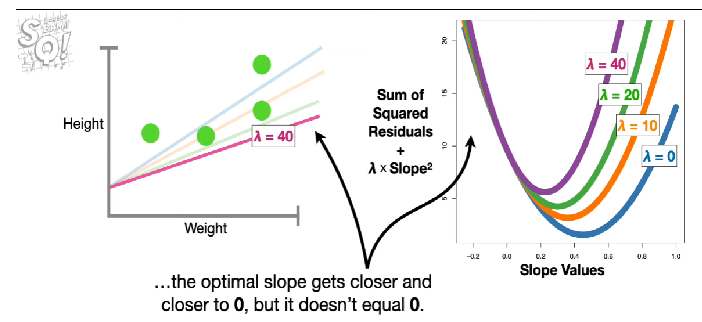

##### Multicolinearidade 

Um dos maiores problemas da regressão tradicional é a multicolinearidade, que ocorre quando uma variável independente pode ser representada como uma combinação linear de outra. A figura abaixo demonstra que qualquer combinação linear dos valores dos coeficientes $\beta_{1}$ e $\beta_{2}$ minimiza a soma dos quadrados dos resíduos, pois não faz diferença entre escolher um ou outro como explicador de y, já que trazem a mesma informação.

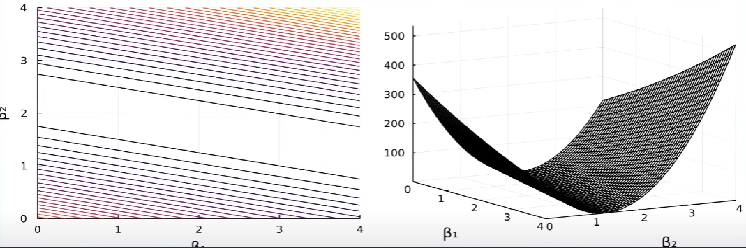

Adicionando um componente fixo à formula que será minimizada, o problema deixa de ter infinitas soluções e passa a ter somente uma. Tanto a regularização L1 quanto a L2 podem ser aplicadas. 

# O modelo ElasticNet

A regressão do tipo ElasticNet terá por objetivo incluir os dois termos de regularização - L1 e L2 - para estimar os coeficientes ótimos. Para isso serão otimizados dois hiperparâmetros por meio de validação cruzada, que são: $\lambda$ (peso das regularizações na estimação do modelo) e $\alpha$ (peso proporcional para a estimação L1 e L2). A fórmula final a ser otimizada se torna:

$$min(\sum{y_{i}-\bar{y}})^2 + \lambda [ \alpha (\sum{|\beta|}) + (1-\alpha) \sum{\beta^2}]$$

# Construindo o Algoritmo

### Importação das Bibliotecas e Manipulação dos Dados

In [4]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Manipular dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../dados/boston_houses.csv")
df.drop(df.columns[0], axis = 1, inplace = True)

X = df.drop("MEDV", axis = 1)
y = df["MEDV"] # Alvo Contínuo: valor mediano das casas em uma vizinhança

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Ajuste do Modelo

In [5]:
modelo = ElasticNet(random_state=42)
parametros = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
    'max_iter': [1000, 10000],
    'l1_ratio': np.arange(0.0, 1.0, 0.1),
    'tol': [0.5]
    }

modelo = GridSearchCV(modelo, parametros, n_jobs = -1, cv = 5, scoring = "r2")
modelo.fit(X_train, y_train)

modelo.best_params_

{'alpha': 0.001, 'l1_ratio': 0.0, 'max_iter': 1000, 'tol': 0.5}

In [10]:
mod = ElasticNet(
    random_state=42,
    alpha = modelo.best_params_['alpha'], 
    max_iter = modelo.best_params_['max_iter'],
    l1_ratio = modelo.best_params_['l1_ratio'],
    tol = modelo.best_params_['tol'])

mod.fit(X_train, y_train)
y_pred_train = mod.predict(X_train)
y_pred = mod.predict(X_test)

Text(0.5, 1.0, 'Coefficients in the ElasticNet Model')

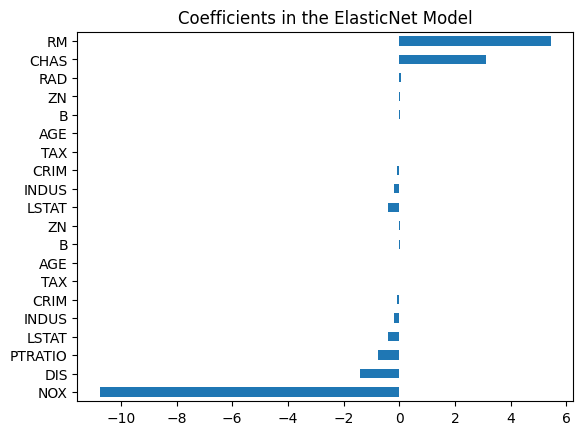

In [12]:
coef = pd.Series(mod.coef_, index = X_train.columns)
important_features = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
important_features.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")

### Métricas de Avaliação

In [18]:
# R-Quadrado
print("Treino: ", modelo.score(X_train, y_train))
print("Teste: ", modelo.score(X_test, y_test)) 

Treino:  0.7289996914807444
Teste:  0.6654935479238017


In [14]:
# Erro Absoluto Médio
print(mean_absolute_error(y_test, y_pred))

2.9771176591887243


In [15]:
# Raiz do Erro Quadrático Médio (RMSE)
mean_squared_error(y_test, y_pred, squared = False)

4.839889603371746